In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df  = pd.read_csv(r'C:\Users\Wiktoria\Desktop\Python Basics\Project5_Pandas\sleep_health_dataset.csv', keep_default_na=False)

In [3]:
df.shape

(374, 13)

In [4]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [8]:
df.isna().any()

Person ID                  False
Gender                     False
Age                        False
Occupation                 False
Sleep Duration             False
Quality of Sleep           False
Physical Activity Level    False
Stress Level               False
BMI Category               False
Blood Pressure             False
Heart Rate                 False
Daily Steps                False
Sleep Disorder             False
dtype: bool

In [9]:
df = df.drop(columns='Person ID')

In [115]:
#SLEEP DISORDER
disorder_count=df['Sleep Disorder'].value_counts()
disorder_count

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Sleep Disorder')

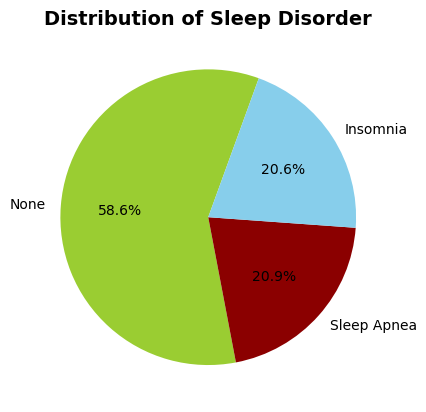

In [12]:
plt.figure()
plt.pie(disorder_count, labels=disorder_count.index, colors = ['yellowgreen', 'darkred', 'skyblue'],
        autopct='%1.1f%%', shadow=False, startangle=70)
plt.title('Distribution of Sleep Disorder', fontsize=14, fontweight='bold')

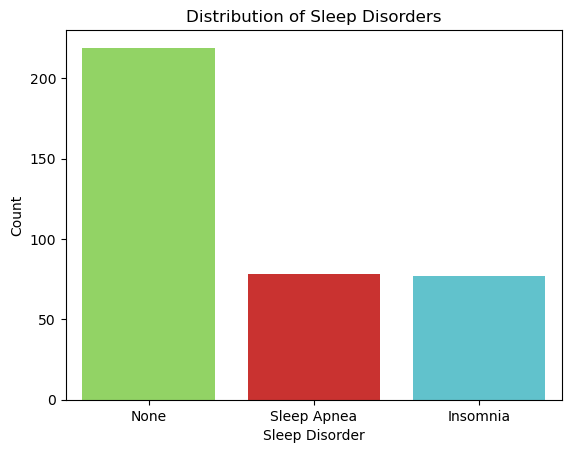

In [13]:
custom_palette = ['#8ee553', '#e21916', '#4fd1de']
plt.figure()
sns.countplot(x='Sleep Disorder', data=df, palette=custom_palette)
plt.title('Distribution of Sleep Disorders')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.show()

In [117]:
#GENDER
gender_count=df['Gender'].value_counts()
gender_count

Gender
Male      189
Female    185
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender Distribution')

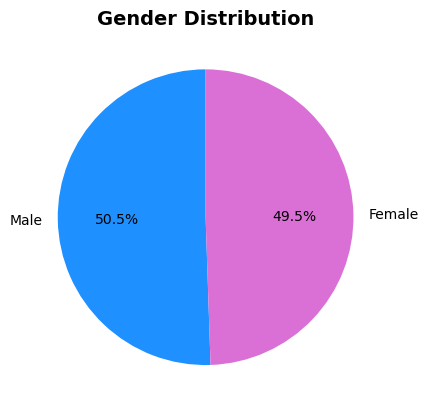

In [16]:
plt.figure()
plt.pie(gender_count, labels=gender_count.index, colors = ['dodgerblue', 'orchid'],
        autopct='%1.1f%%', shadow=False, startangle=90)
plt.title('Gender Distribution', fontsize=14, fontweight='bold')

In [17]:
gender_sleep_disorder = df.groupby(['Gender', 'Sleep Disorder']).size().unstack(fill_value=0)

In [18]:
colors = ['#4fd1de', '#8ee553', '#e21916']

<Figure size 640x480 with 0 Axes>

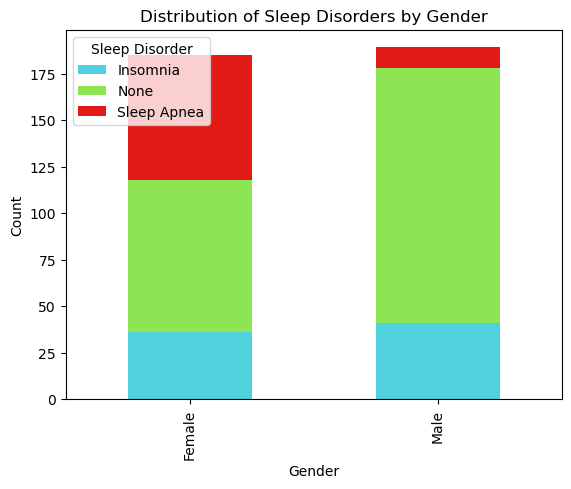

In [19]:
plt.figure()
gender_sleep_disorder.plot(kind='bar', stacked=True, color=colors)
plt.title('Distribution of Sleep Disorders by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Sleep Disorder')

Text(0, 0.5, 'Count')

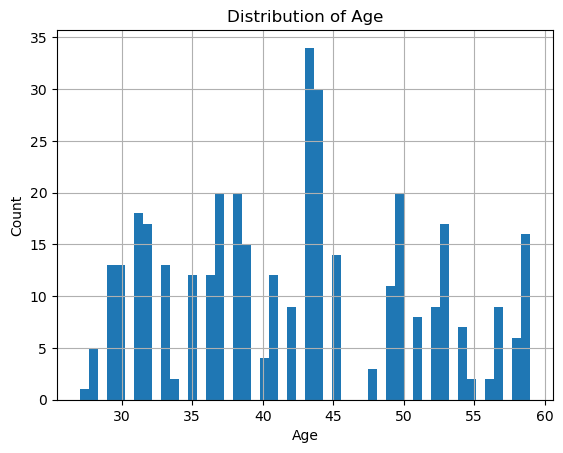

In [20]:
#AGE
plt.figure()
df['Age'].hist(bins=50)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Age')

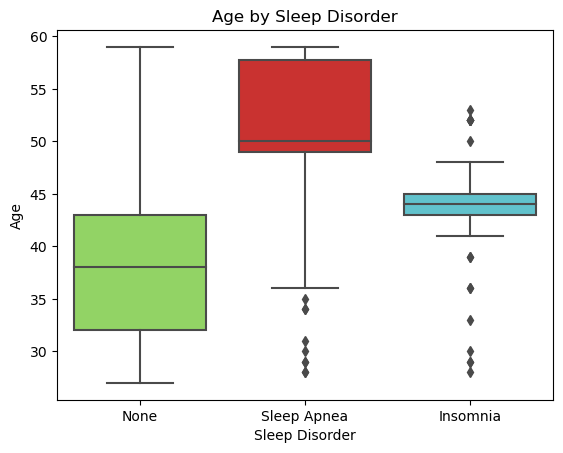

In [21]:
plt.figure()
sns.boxplot(x='Sleep Disorder', y='Age', data=df, palette=custom_palette)
plt.title('Age by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Age')

In [22]:
bins = [25, 30, 35, 40, 45, 50, 55, 60]
labels = ['25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60']

In [23]:
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [24]:
age_sleep_disorder = df.groupby(['Age Range', 'Sleep Disorder']).size().unstack(fill_value=0)

In [25]:
age_sleep_disorder_perc = age_sleep_disorder.apply(lambda x: x/x.sum(), axis=1) * 100

<Figure size 640x480 with 0 Axes>

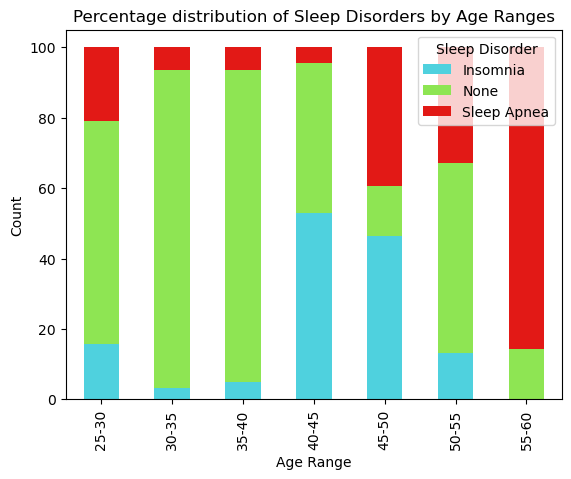

In [26]:
plt.figure()
age_sleep_disorder_perc.plot(kind='bar', stacked=True, color=colors)
plt.title('Percentage distribution of Sleep Disorders by Age Ranges')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.legend(title='Sleep Disorder')

In [112]:
#OCCUPATION
df['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

Text(0, 0.5, 'Count')

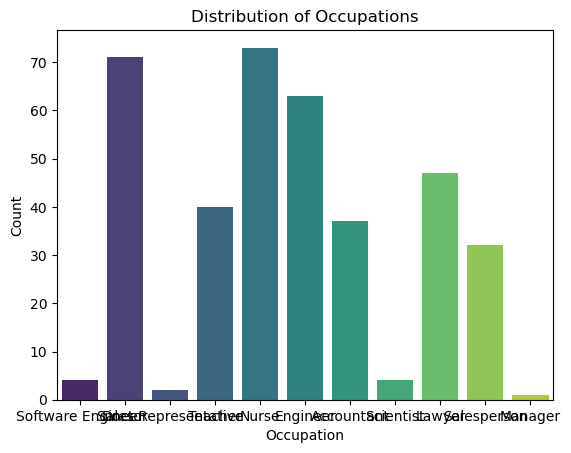

In [29]:
plt.figure()
sns.countplot(x='Occupation', data=df, palette='viridis')
plt.title('Distribution of Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')

In [30]:
def categorize_occupation(occupation):
    if occupation in ['Nurse', 'Doctor']:
        return 'Medicine'
    elif occupation in ['Engineer', 'Software Engineer', 'Scientist']:
        return 'Technology and Engineering'
    elif occupation in ['Lawyer']:
        return 'Law'
    elif occupation in ['Accountant', 'Salesperson', 'Sales Representative', 'Manager']:
        return 'Business and Finance'
    else:
        return 'Education'

In [31]:
df['Occupation Group'] = df['Occupation'].apply(categorize_occupation)

In [32]:
occupation_sleep_disorder = df.groupby(['Occupation Group', 'Sleep Disorder']).size().unstack(fill_value=0)

In [33]:
occupation_sleep_disorder_perc = occupation_sleep_disorder.apply(lambda x: x/x.sum(), axis=1) * 100

<Figure size 640x480 with 0 Axes>

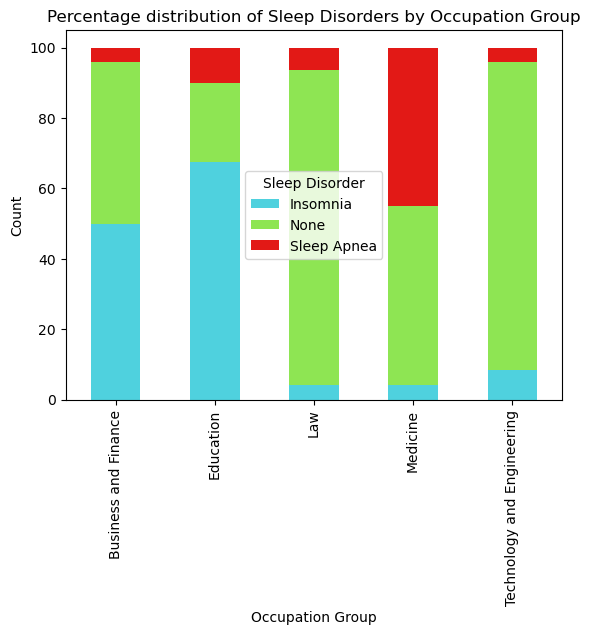

In [34]:
plt.figure()
occupation_sleep_disorder_perc.plot(kind='bar', stacked=True, color=colors)
plt.title('Percentage distribution of Sleep Disorders by Occupation Group')
plt.xlabel('Occupation Group')
plt.ylabel('Count')
plt.legend(title='Sleep Disorder')

Text(0, 0.5, 'Count')

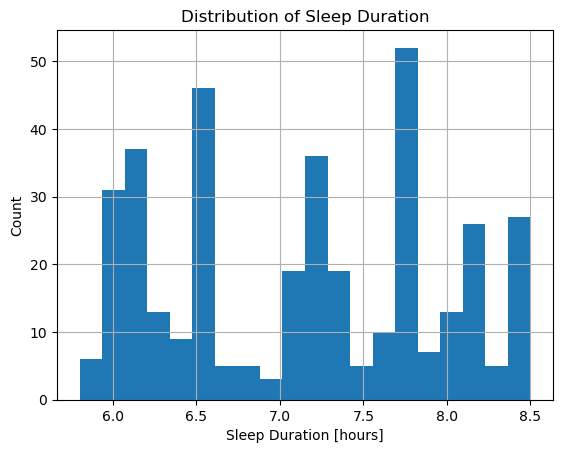

In [35]:
#SLEEP DURATION
plt.figure()
df['Sleep Duration'].hist(bins=20)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration [hours]')
plt.ylabel('Count')

In [36]:
mean_sleep_duration = df.groupby('Sleep Disorder')['Sleep Duration'].mean()

Text(0, 0.5, 'Average sleep duration [hours]')

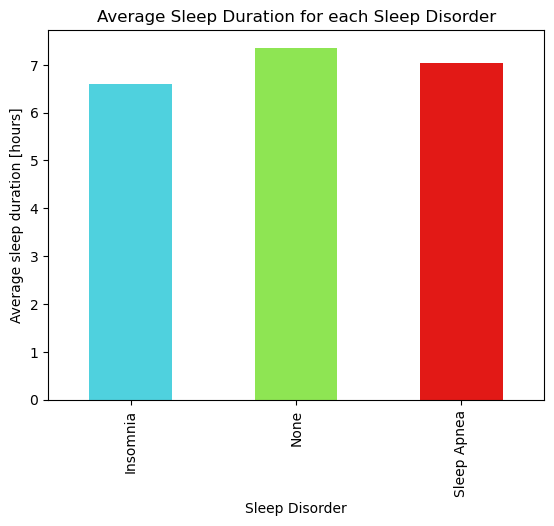

In [37]:
plt.figure()
mean_sleep_duration.plot(kind='bar', color=colors)
plt.title('Average Sleep Duration for each Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Average sleep duration [hours]')

Text(0, 0.5, 'Sleep Duration')

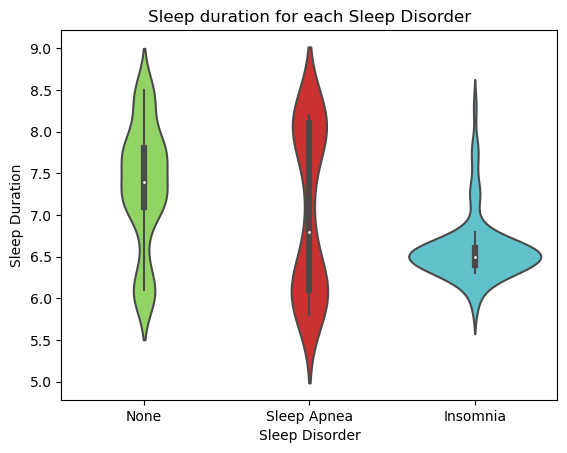

In [38]:
plt.figure()
sns.violinplot(x='Sleep Disorder', y='Sleep Duration', data=df, palette=custom_palette)
plt.title('Sleep duration for each Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Sleep Duration')

In [39]:
mean_sleep_duration_by_gender = df.groupby('Gender')['Sleep Duration'].mean()

Text(0, 0.5, 'Average sleep duration [hours]')

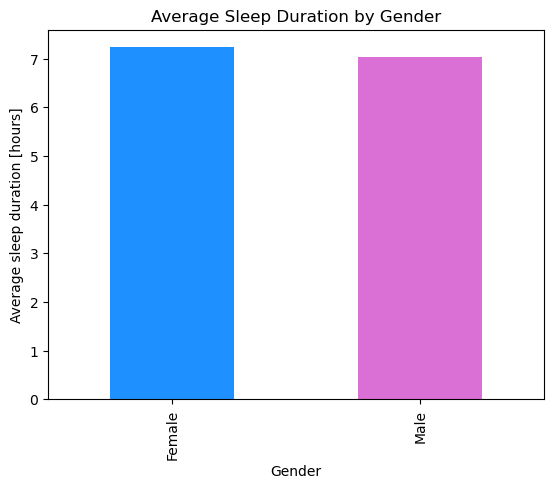

In [40]:
plt.figure()
mean_sleep_duration_by_gender.plot(kind='bar', color=['dodgerblue', 'orchid'])
plt.title('Average Sleep Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Average sleep duration [hours]')

In [41]:
mean_sleep_duration_by_occup = df.groupby('Occupation Group')['Sleep Duration'].mean()

Text(0, 0.5, 'Average sleep duration [hours]')

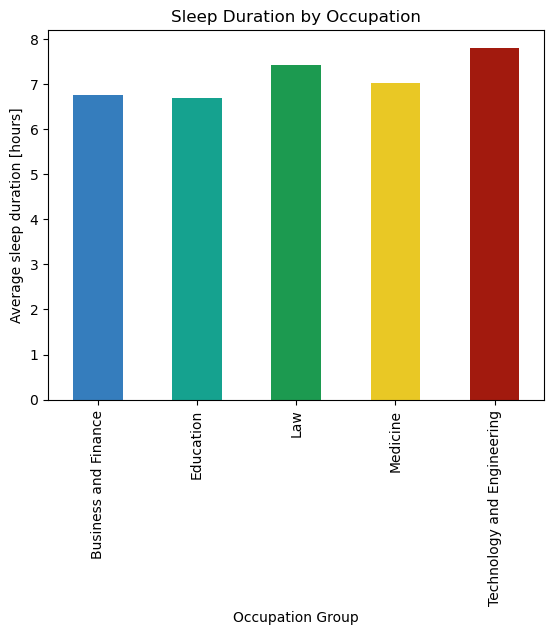

In [42]:
plt.figure()
mean_sleep_duration_by_occup.plot(kind='bar', color=['#357dbd', '#15a28f', '#1c9a50', '#e9c825', '#a21a0e'])
plt.title('Sleep Duration by Occupation')
plt.xlabel('Occupation Group')
plt.ylabel('Average sleep duration [hours]')

Text(0, 0.5, 'Count')

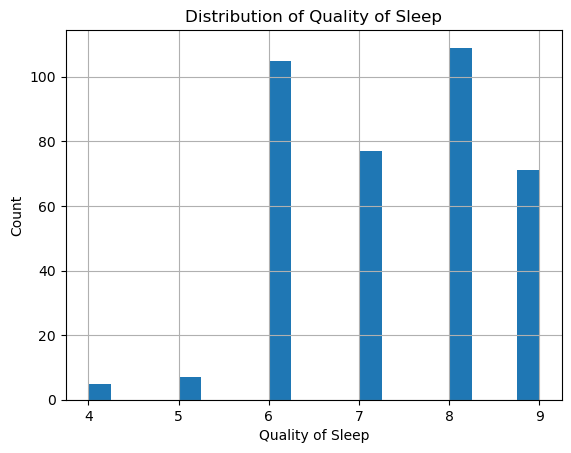

In [43]:
plt.figure()
df['Quality of Sleep'].hist(bins=20)
plt.title('Distribution of Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Count')

In [44]:
quality_of_sleep = df.groupby('Sleep Disorder')['Quality of Sleep'].mean()

Text(0, 0.5, 'Average Quality of Sleep')

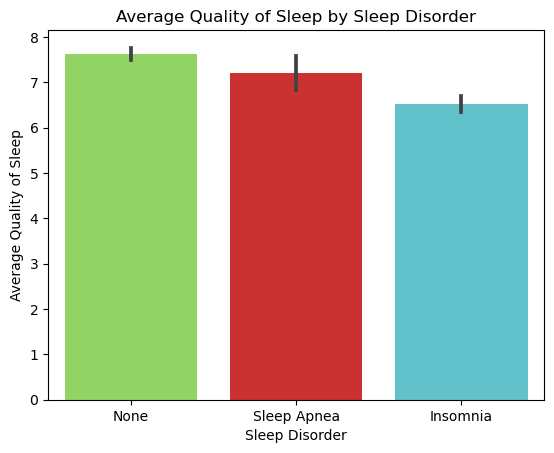

In [45]:
plt.figure()
sns.barplot(x='Sleep Disorder', y='Quality of Sleep', data=df, palette=custom_palette)
plt.title('Average Quality of Sleep by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Average Quality of Sleep')

In [46]:
quality_of_sleep_age = df.groupby('Age Range')['Quality of Sleep'].mean()

Text(0, 0.5, 'Average Quality of Sleep')

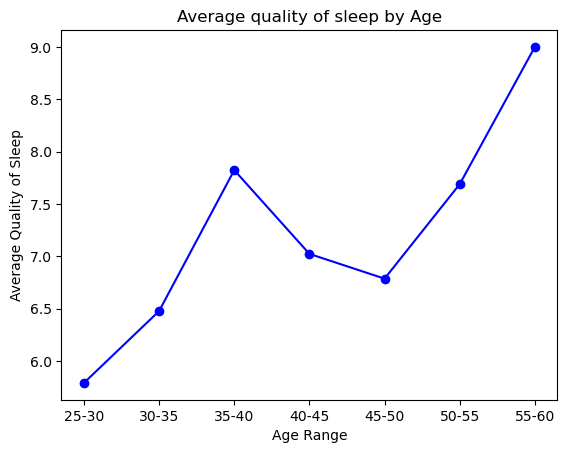

In [47]:
plt.figure()
quality_of_sleep_age.plot(kind='line', marker='o', color='blue')
plt.title('Average quality of sleep by Age')
plt.xlabel('Age Range')
plt.ylabel('Average Quality of Sleep')

Text(0, 0.5, 'Count')

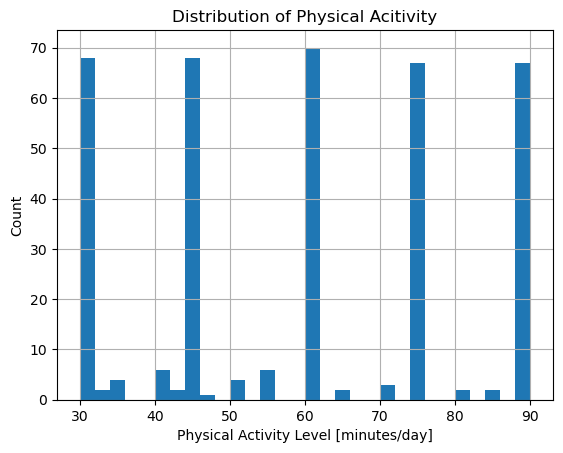

In [48]:
#PHYSICAL ACTIVITY
plt.figure()
df['Physical Activity Level'].hist(bins=30)
plt.title('Distribution of Physical Acitivity')
plt.xlabel('Physical Activity Level [minutes/day]')
plt.ylabel('Count')

In [49]:
activity_gender_age = df.groupby(['Age Range', 'Gender'])['Physical Activity Level'].mean().reset_index()

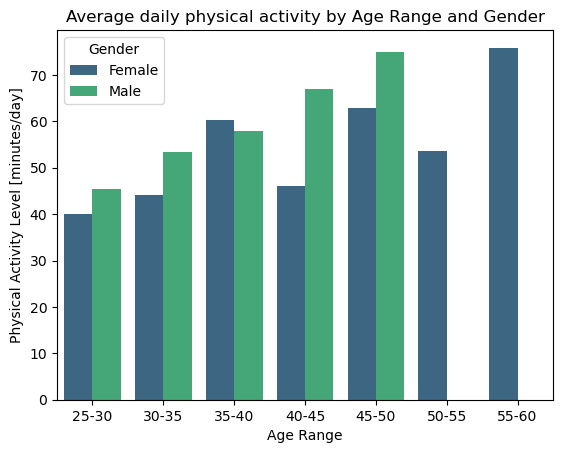

In [50]:
plt.figure()
sns.barplot(x='Age Range', y='Physical Activity Level', hue='Gender',
            data=activity_gender_age, palette='viridis')
plt.title('Average daily physical activity by Age Range and Gender')
plt.xlabel('Age Range')
plt.ylabel('Physical Activity Level [minutes/day]')
plt.legend(title='Gender')

In [51]:
activity_by_occup = df.groupby('Occupation Group')['Physical Activity Level'].mean().reset_index()

Text(0, 0.5, 'Physical Activity Level [minutes/day]')

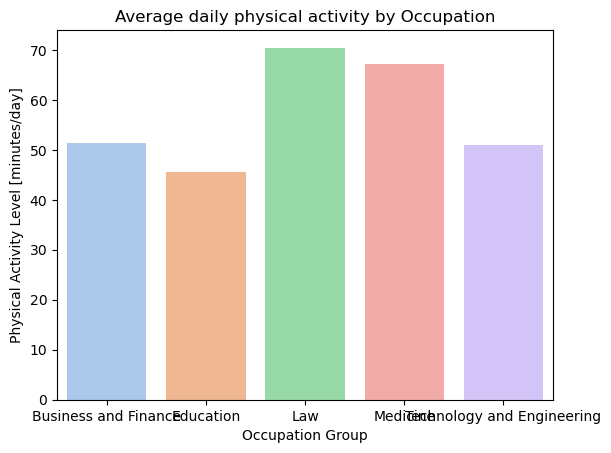

In [52]:
plt.figure()
sns.barplot(x='Occupation Group', y='Physical Activity Level', data=activity_by_occup, palette='pastel')
plt.title('Average daily physical activity by Occupation')
plt.xlabel('Occupation Group')
plt.ylabel('Physical Activity Level [minutes/day]')

In [53]:
sleep_quality_activity_corr = df['Quality of Sleep'].corr(df['Physical Activity Level'])

Text(0, 0.5, 'Quality of Sleep')

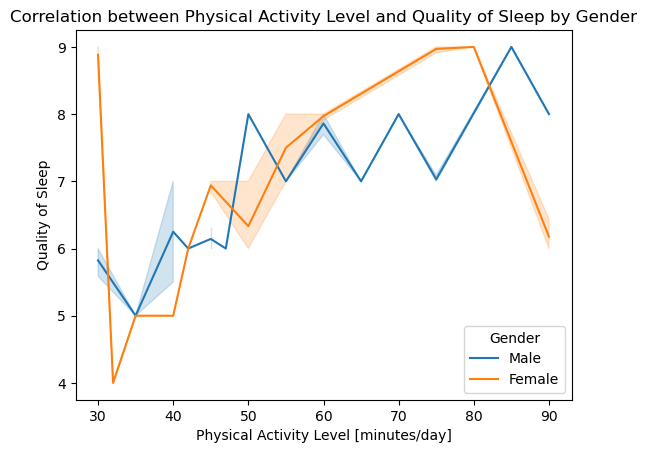

In [54]:
plt.figure()
sns.lineplot(x='Physical Activity Level', y='Quality of Sleep', hue='Gender', data=df)
plt.title('Correlation between Physical Activity Level and Quality of Sleep by Gender')
plt.xlabel('Physical Activity Level [minutes/day]')
plt.ylabel('Quality of Sleep')

In [55]:
insomnia_data = df.groupby('Sleep Disorder')['Physical Activity Level'].mean().reset_index()

In [56]:
palette = ['#4fd1de', '#8ee553', '#e21916']

Text(0, 0.5, 'Physical Activity Level [minutes/day]')

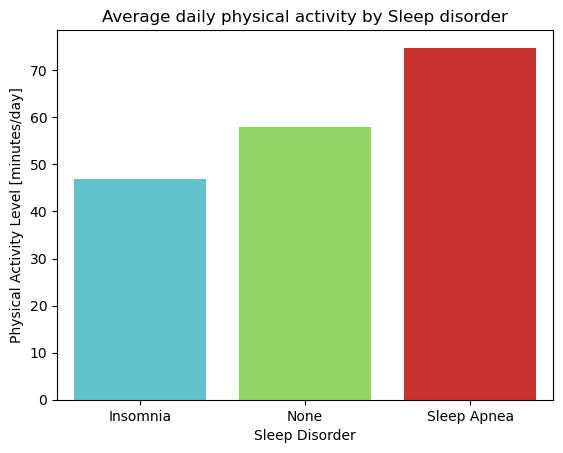

In [57]:
plt.figure()
sns.barplot(x='Sleep Disorder', y='Physical Activity Level', data=insomnia_data, palette=palette)
plt.title('Average daily physical activity by Sleep disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Physical Activity Level [minutes/day]')

Text(0, 0.5, 'Count')

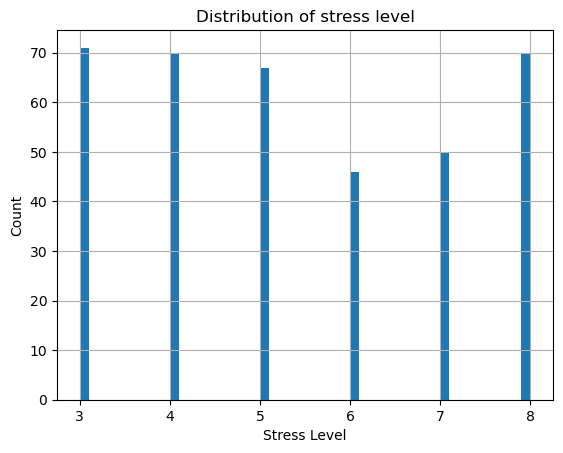

In [58]:
#STRESS LEVEL
plt.figure()
df['Stress Level'].hist(bins=50)
plt.title('Distribution of stress level')
plt.xlabel('Stress Level')
plt.ylabel('Count')

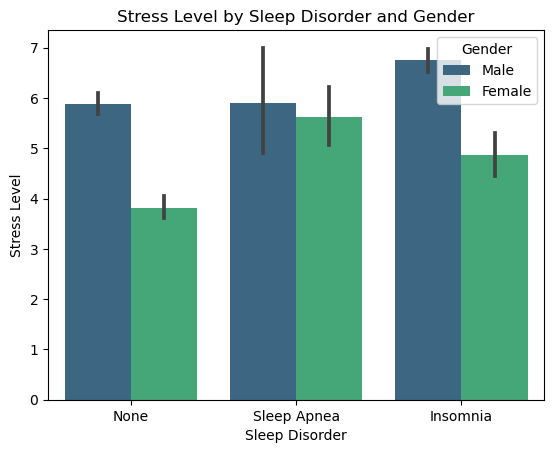

In [59]:
plt.figure()
sns.barplot(x='Sleep Disorder', y='Stress Level', hue='Gender', data=df, palette='viridis')
plt.title('Stress Level by Sleep Disorder and Gender')
plt.xlabel('Sleep Disorder')
plt.ylabel('Stress Level')
plt.legend(title='Gender')

In [60]:
mean_stress_by_age_occup = df.groupby(['Age Range', 'Occupation Group'])['Stress Level'].mean().reset_index()

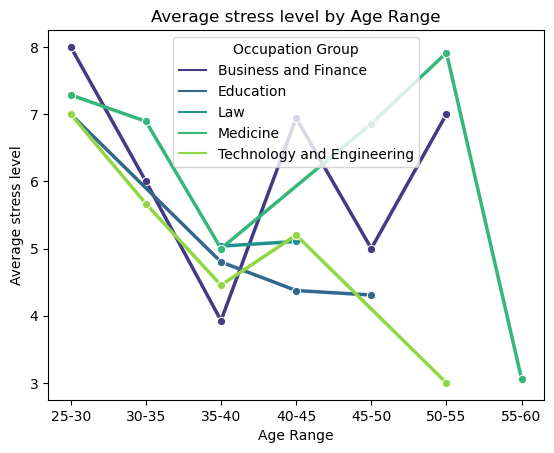

In [61]:
plt.figure()
sns.lineplot(x='Age Range', y='Stress Level', hue='Occupation Group', data=mean_stress_by_age_occup, marker='o', palette='viridis', linewidth=2.5)
plt.title('Average stress level by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Average stress level')
plt.legend(title='Occupation Group')

Text(0, 0.5, 'Quality of Sleep')

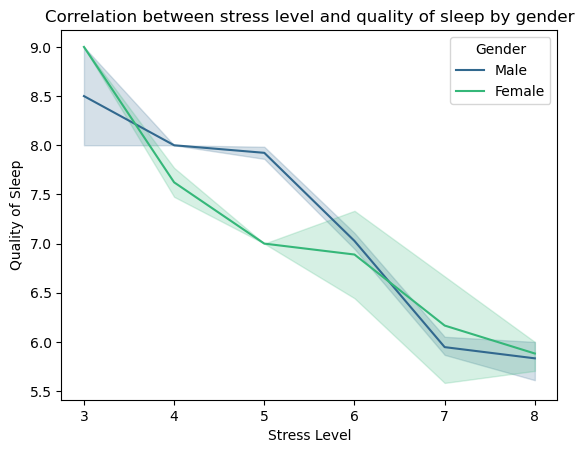

In [62]:
plt.figure()
sns.lineplot(x='Stress Level', y='Quality of Sleep', hue='Gender', data=df, palette='viridis')
plt.title('Correlation between stress level and quality of sleep by gender')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')

In [63]:
#BMI CATEGORY
df['BMI Category'].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [64]:
df['BMI Category'] = df['BMI Category'].replace({
    'Normal Weight': 'Normal'
    })

In [65]:
df['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

Text(0, 0.5, 'Count')

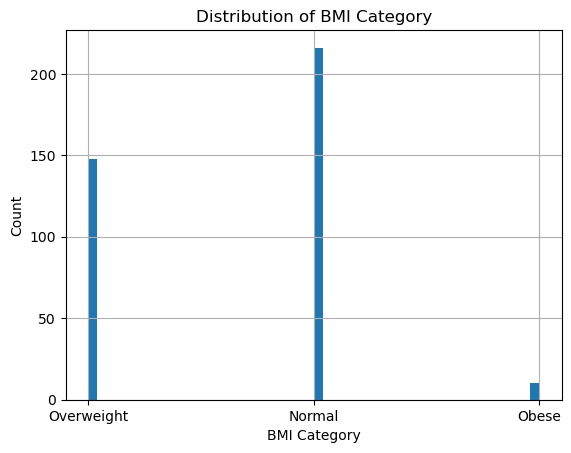

In [66]:
plt.figure()
df['BMI Category'].hist(bins=50)
plt.title('Distribution of BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')

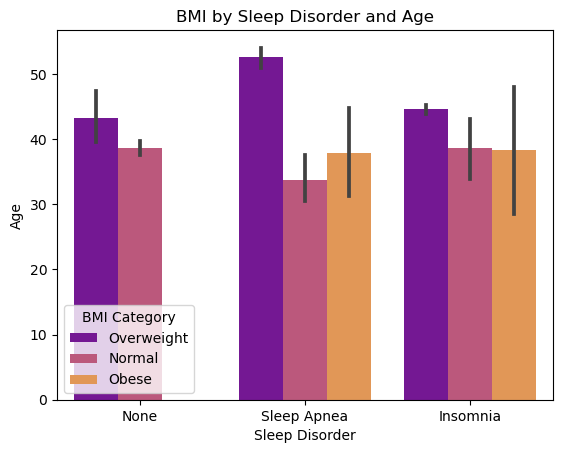

In [67]:
plt.figure()
sns.barplot(x='Sleep Disorder', y='Age', hue='BMI Category', data=df, palette='plasma')
plt.title('BMI by Sleep Disorder and Age')
plt.xlabel('Sleep Disorder')
plt.ylabel('Age')
plt.legend(title='BMI Category')

In [68]:
df_bmi_encoded = pd.get_dummies(df['BMI Category'])

In [69]:
df = pd.concat([df, df_bmi_encoded], axis=1)

In [70]:
df['Normal'] = df['Normal'].astype(int)
df['Obese'] = df['Obese'].astype(int)
df['Overweight'] = df['Overweight'].astype(int)

In [71]:
bmi_columns = [col for col in df.columns if col in ['Normal', 'Obese', 'Overweight']]

In [72]:
for bmi_column in bmi_columns:
        corr = df[bmi_column].corr(df['Quality of Sleep'])
        print(f'Correlation between {bmi_column} and Quality of Sleep: {corr:.2f}')

Correlation between Normal and Quality of Sleep: 0.32
Correlation between Obese and Quality of Sleep: -0.13
Correlation between Overweight and Quality of Sleep: -0.28


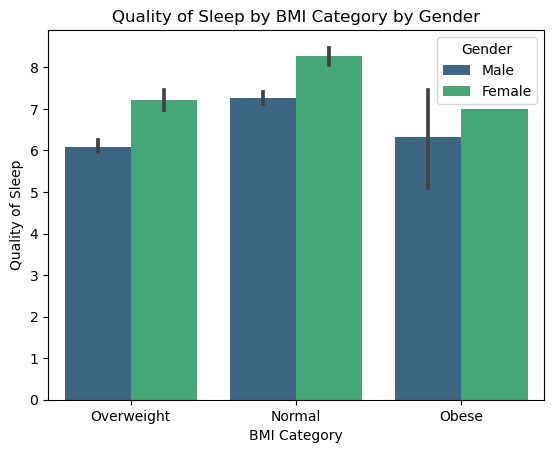

In [73]:
plt.figure()
sns.barplot(x='BMI Category', y='Quality of Sleep', hue='Gender', data=df, palette='viridis')
plt.title('Quality of Sleep by BMI Category by Gender')
plt.xlabel('BMI Category')
plt.ylabel('Quality of Sleep')
plt.legend(title='Gender')

In [74]:
#BLOOD PRESSURE
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

In [75]:
df['Systolic'] = pd.to_numeric(df['Systolic'])
df['Diastolic'] = pd.to_numeric(df['Diastolic'])

In [76]:
bp_index = df.columns.get_loc('Blood Pressure')

In [77]:
new_list = (
    df.columns[:bp_index+1].tolist() +
    ['Systolic', 'Diastolic'] +
    df.columns[bp_index+1:].tolist()    
    )

df = df[new_list]

In [78]:
df = df.loc[:, ~df.columns.duplicated()]

In [79]:
bp_columns = [col for col in df.columns if col in ['Systolic', 'Diastolic']]

In [80]:
for bp_col in bp_columns:
    corr = df[bp_col].corr(df['Quality of Sleep'])
    print(f'Correlation between {bp_col} and Quality of Sleep: {corr:.2f}')

Correlation between Systolic and Quality of Sleep: -0.12
Correlation between Diastolic and Quality of Sleep: -0.11


In [81]:
df_melted = df.melt(id_vars='Sleep Disorder', value_vars=['Systolic', 'Diastolic'], 
                     var_name='Pressure Type', value_name='Pressure')

Text(0, 0.5, 'Pressure')

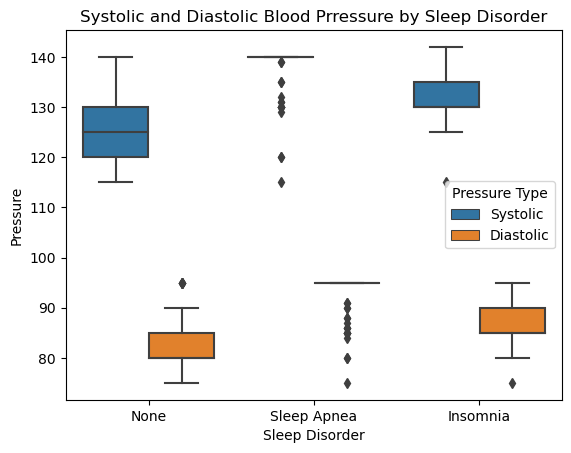

In [82]:
plt.figure()
sns.boxplot(x='Sleep Disorder', y='Pressure', hue='Pressure Type', data=df_melted)
plt.title('Systolic and Diastolic Blood Prressure by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Pressure')

Text(0, 0.5, 'Systolic Blood Pressure')

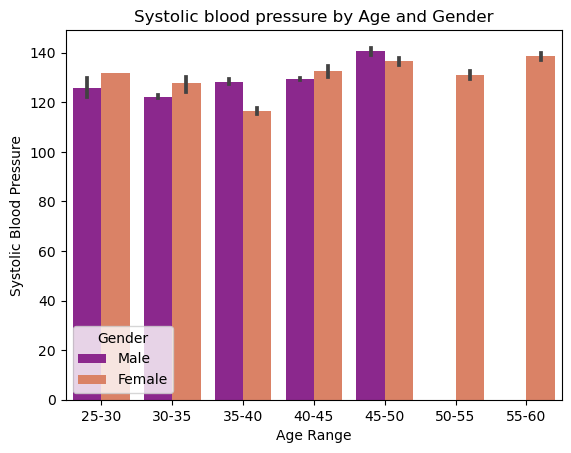

In [83]:
plt.figure()
sns.barplot(x='Age Range', y='Systolic', hue='Gender', data=df, palette='plasma')
plt.title('Systolic blood pressure by Age and Gender')
plt.xlabel('Age Range')
plt.ylabel('Systolic Blood Pressure')

Text(0, 0.5, 'Diastolic Blood Pressure')

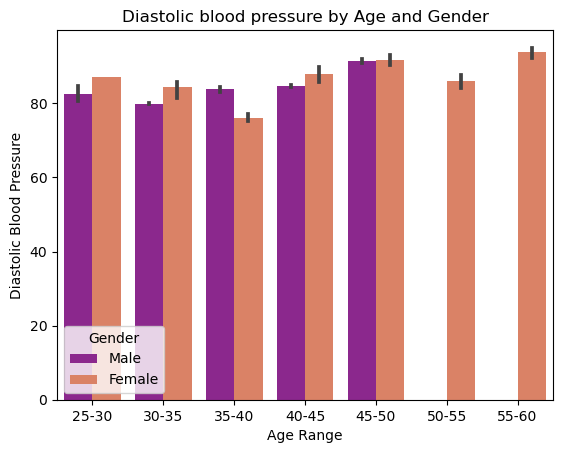

In [84]:
plt.figure()
sns.barplot(x='Age Range', y='Diastolic', hue='Gender', data=df, palette='plasma')
plt.title('Diastolic blood pressure by Age and Gender')
plt.xlabel('Age Range')
plt.ylabel('Diastolic Blood Pressure')

In [85]:
bp_category = [
    (df['Systolic']<120) & (df['Diastolic']<80),
    (df['Systolic'].between(120,129)) & (df['Diastolic']<=85),
    (df['Systolic'].between(130,139)) & (df['Diastolic']<=89),
    (df['Systolic']>=140) | (df['Diastolic']>=90 )
    ]

In [86]:
bp_labels = ['Optimal', 'Normal','High Normal','Hypertension']

In [87]:
df['Blood Pressure Category'] = np.select(bp_category, bp_labels, default='Undefined')

In [88]:
undef_sum = (df['Blood Pressure Category'] == 'Undefined').sum()
undef_row = df.loc[df['Blood Pressure Category'] == 'Undefined']

In [89]:
df_bp_by_occup = df.groupby(['Occupation Group', 'Blood Pressure Category']).size().unstack().apply(lambda x: x/x.sum(), axis=1)

In [90]:
df_bp_by_occup = df_bp_by_occup.reset_index()

In [91]:
df_bp_perc_melted = df_bp_by_occup.melt(id_vars='Occupation Group', var_name='Blood Pressure Category', value_name='Percentage')

In [92]:
bp_palette = {
    'Optimal':'#21bf17',
    'Normal': '#14afcd',
    'High Normal': '#e1c109',
    'Hypertension':'#d60e1a'
    }

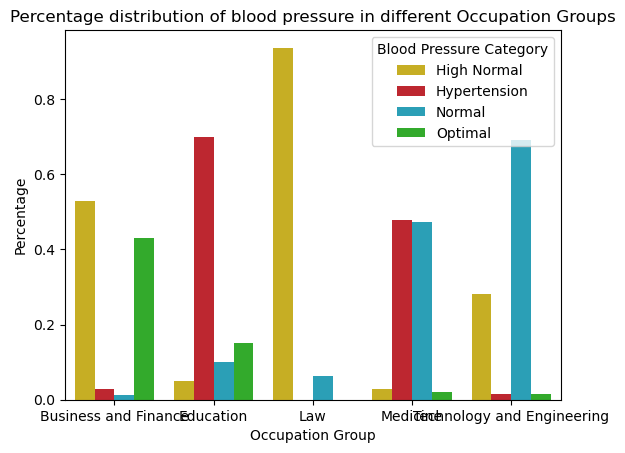

In [93]:
plt.figure()
sns.barplot(data=df_bp_perc_melted, x='Occupation Group', y='Percentage', hue='Blood Pressure Category', palette=bp_palette)
plt.title('Percentage distribution of blood pressure in different Occupation Groups')
plt.xlabel('Occupation Group')
plt.ylabel('Percentage')
plt.legend(title='Blood Pressure Category')

<Axes: >

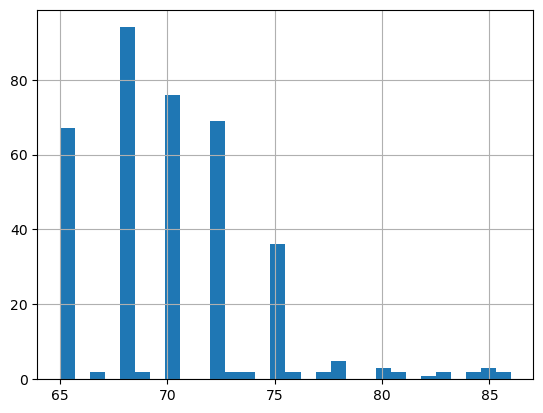

In [94]:
#HEART RATE
df['Heart Rate'].hist(bins=30)

In [95]:
corr_hr_quality_sleep = df['Heart Rate'].corr(df['Quality of Sleep'])

Text(0, 0.5, 'Quality of Sleep')

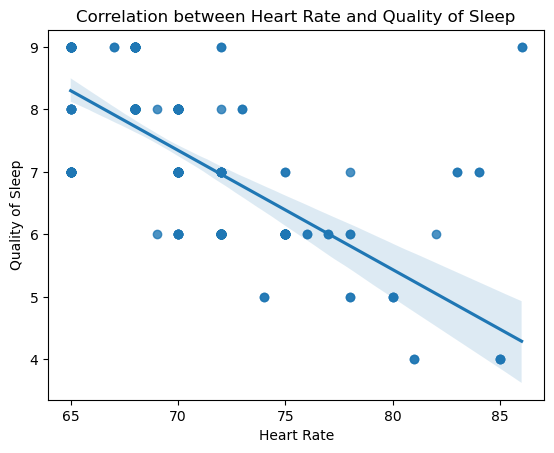

In [96]:
plt.figure()
sns.regplot(data=df, x='Heart Rate', y='Quality of Sleep')
plt.title('Correlation between Heart Rate and Quality of Sleep')
plt.xlabel('Heart Rate')
plt.ylabel('Quality of Sleep')

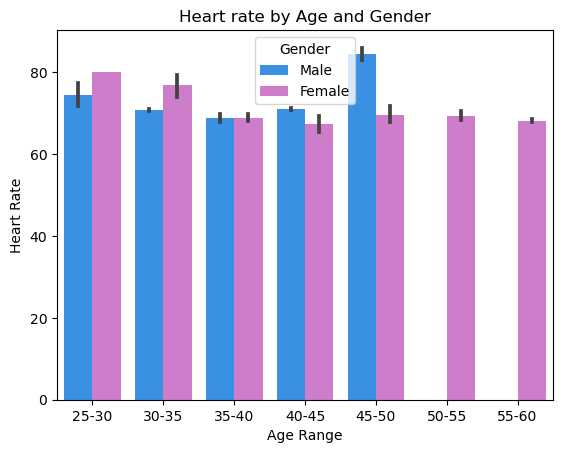

In [97]:
plt.figure()
sns.barplot(data=df, x='Age Range', y='Heart Rate', hue='Gender', palette=['dodgerblue', 'orchid'])
plt.title('Heart rate by Age and Gender')
plt.xlabel('Age Range')
plt.ylabel('Heart Rate')
plt.legend(title='Gender')

Text(0, 0.5, 'Quality of Sleep')

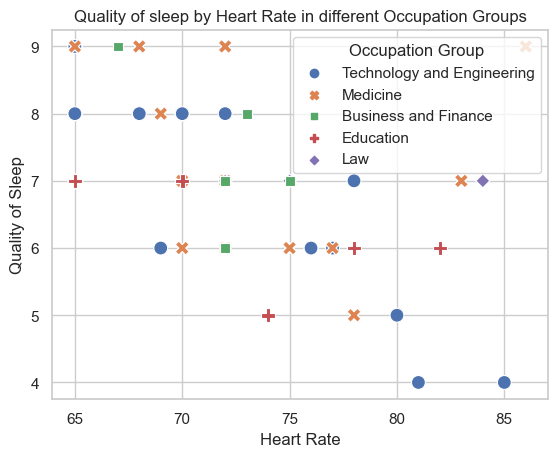

In [98]:
sns.set(style='whitegrid')
plt.figure()
sns.scatterplot(x='Heart Rate', y='Quality of Sleep', hue='Occupation Group', style='Occupation Group', s=100, data=df)
plt.title('Quality of sleep by Heart Rate in different Occupation Groups')
plt.xlabel('Heart Rate')
plt.ylabel('Quality of Sleep')

C:\Users\Wiktoria\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(62.9707109375, 0.5, 'Quality of Sleep')

<Figure size 640x480 with 0 Axes>

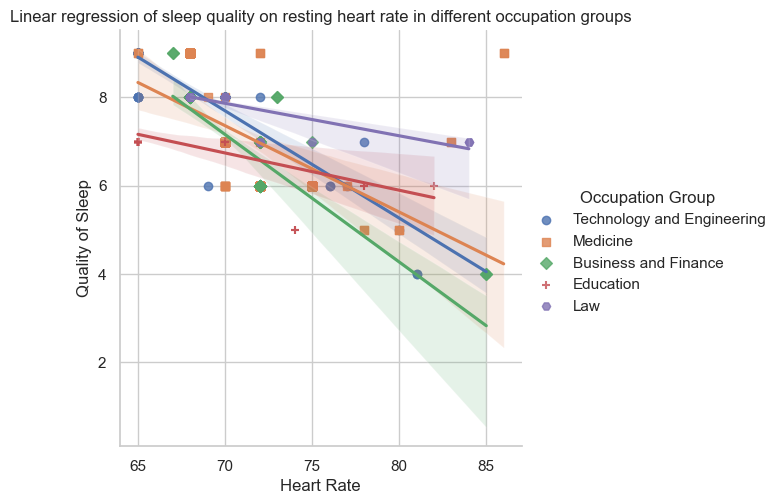

In [99]:
sns.set(style='whitegrid')
plt.figure()
sns.lmplot(data=df, x='Heart Rate', y='Quality of Sleep', hue='Occupation Group', markers=["o", "s", "D", "+", "H"], palette='deep')
plt.title('Linear regression of sleep quality on resting heart rate in different occupation groups')
plt.xlabel('Heart Rate')
plt.ylabel('Quality of Sleep')

Text(0, 0.5, 'Sleep Duration')

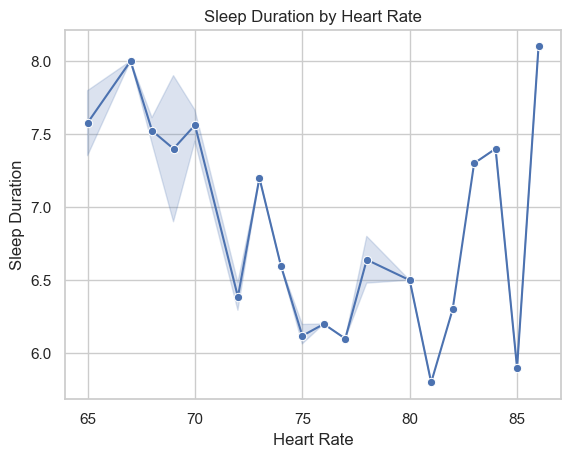

In [100]:
plt.figure()
sns.lineplot(data=df, x='Heart Rate', y='Sleep Duration', marker='o', linestyle='-')
plt.title('Sleep Duration by Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Sleep Duration')

Text(0, 0.5, 'Sleep Duration')

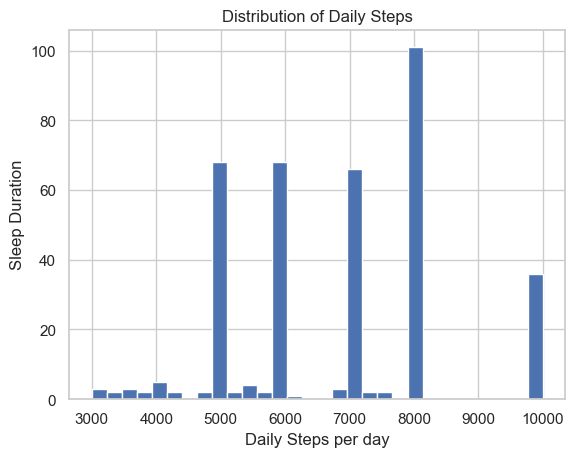

In [101]:
#DAILY STEPS
df['Daily Steps'].hist(bins=30)
plt.title('Distribution of Daily Steps')
plt.xlabel('Daily Steps per day')
plt.ylabel('Sleep Duration')

In [102]:
corr_steps_quality_sleep = df['Daily Steps'].corr(df['Quality of Sleep'])
corr_steps_quality_sleep

0.016791414924716853

In [103]:
corr_steps_activity = df['Daily Steps'].corr(df['Physical Activity Level'])
corr_steps_activity

0.7727230504529328

Text(0, 0.5, 'Daily Steps per day')

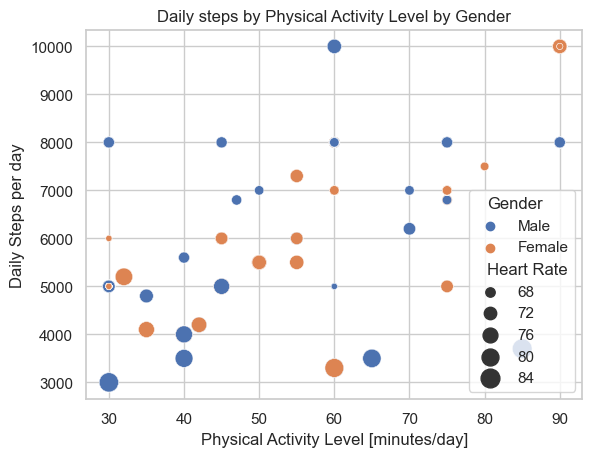

In [104]:
plt.figure()
sns.scatterplot(data=df, x='Physical Activity Level', y='Daily Steps', hue='Gender', size='Heart Rate', sizes=(20,200))
plt.title('Daily steps by Physical Activity Level by Gender')
plt.xlabel('Physical Activity Level [minutes/day]')
plt.ylabel('Daily Steps per day')

Text(0, 0.5, 'Daily Steps')

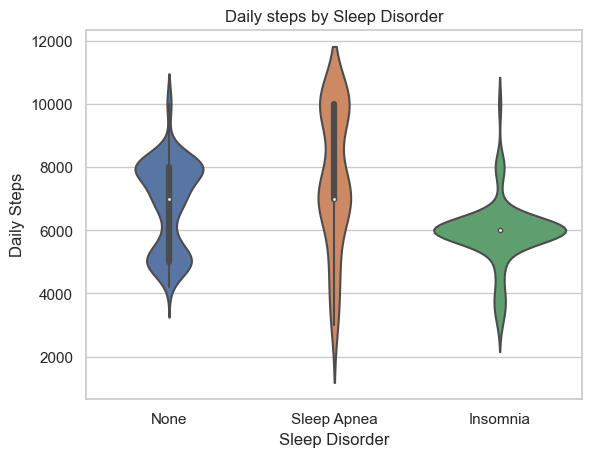

In [105]:
plt.figure()
sns.violinplot(data=df, x='Sleep Disorder', y='Daily Steps')
plt.title('Daily steps by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Daily Steps')

Text(0, 0.5, 'Daily Steps')

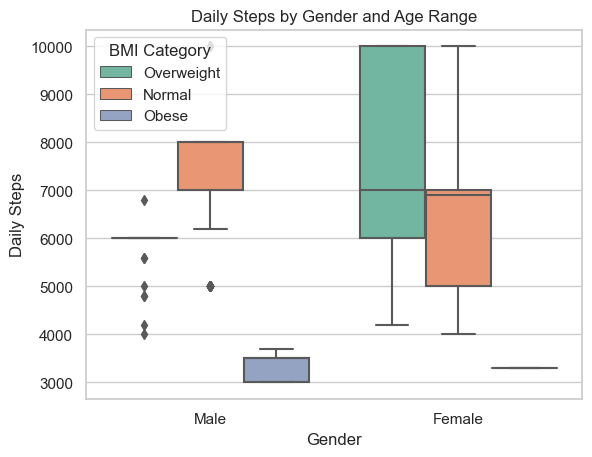

In [106]:
plt.figure()
sns.boxplot(x='Gender', y='Daily Steps', hue='BMI Category', data=df, palette='Set2')
plt.title('Daily Steps by Gender and Age Range')
plt.xlabel('Gender')
plt.ylabel('Daily Steps')

In [107]:
df_with_num_col = df.drop(columns=['Gender', 'Occupation', 'BMI Category',
                                'Blood Pressure', 'Sleep Disorder', 'Age Range',
                                'Occupation Group', 'Blood Pressure Category'])

Text(0.5, 1.0, 'Corr')

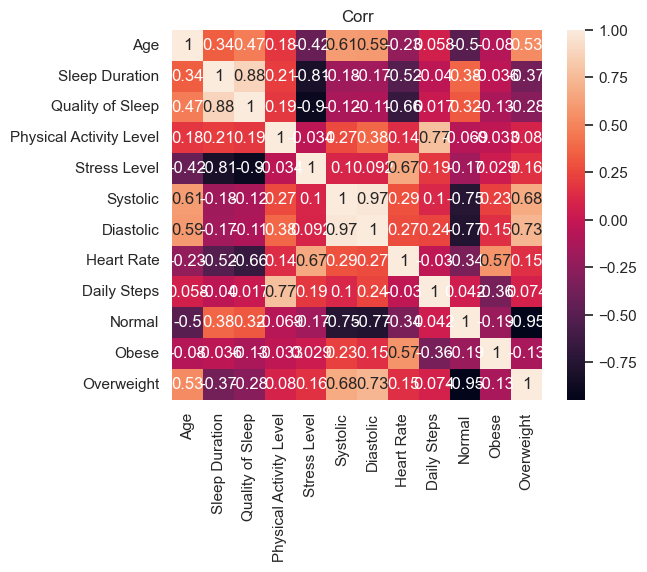

In [108]:
corr_matrix = df_with_num_col.corr()

plt.figure()
sns.heatmap(corr_matrix, annot=True, square=True)
plt.title('Corr')

C:\Users\Wiktoria\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

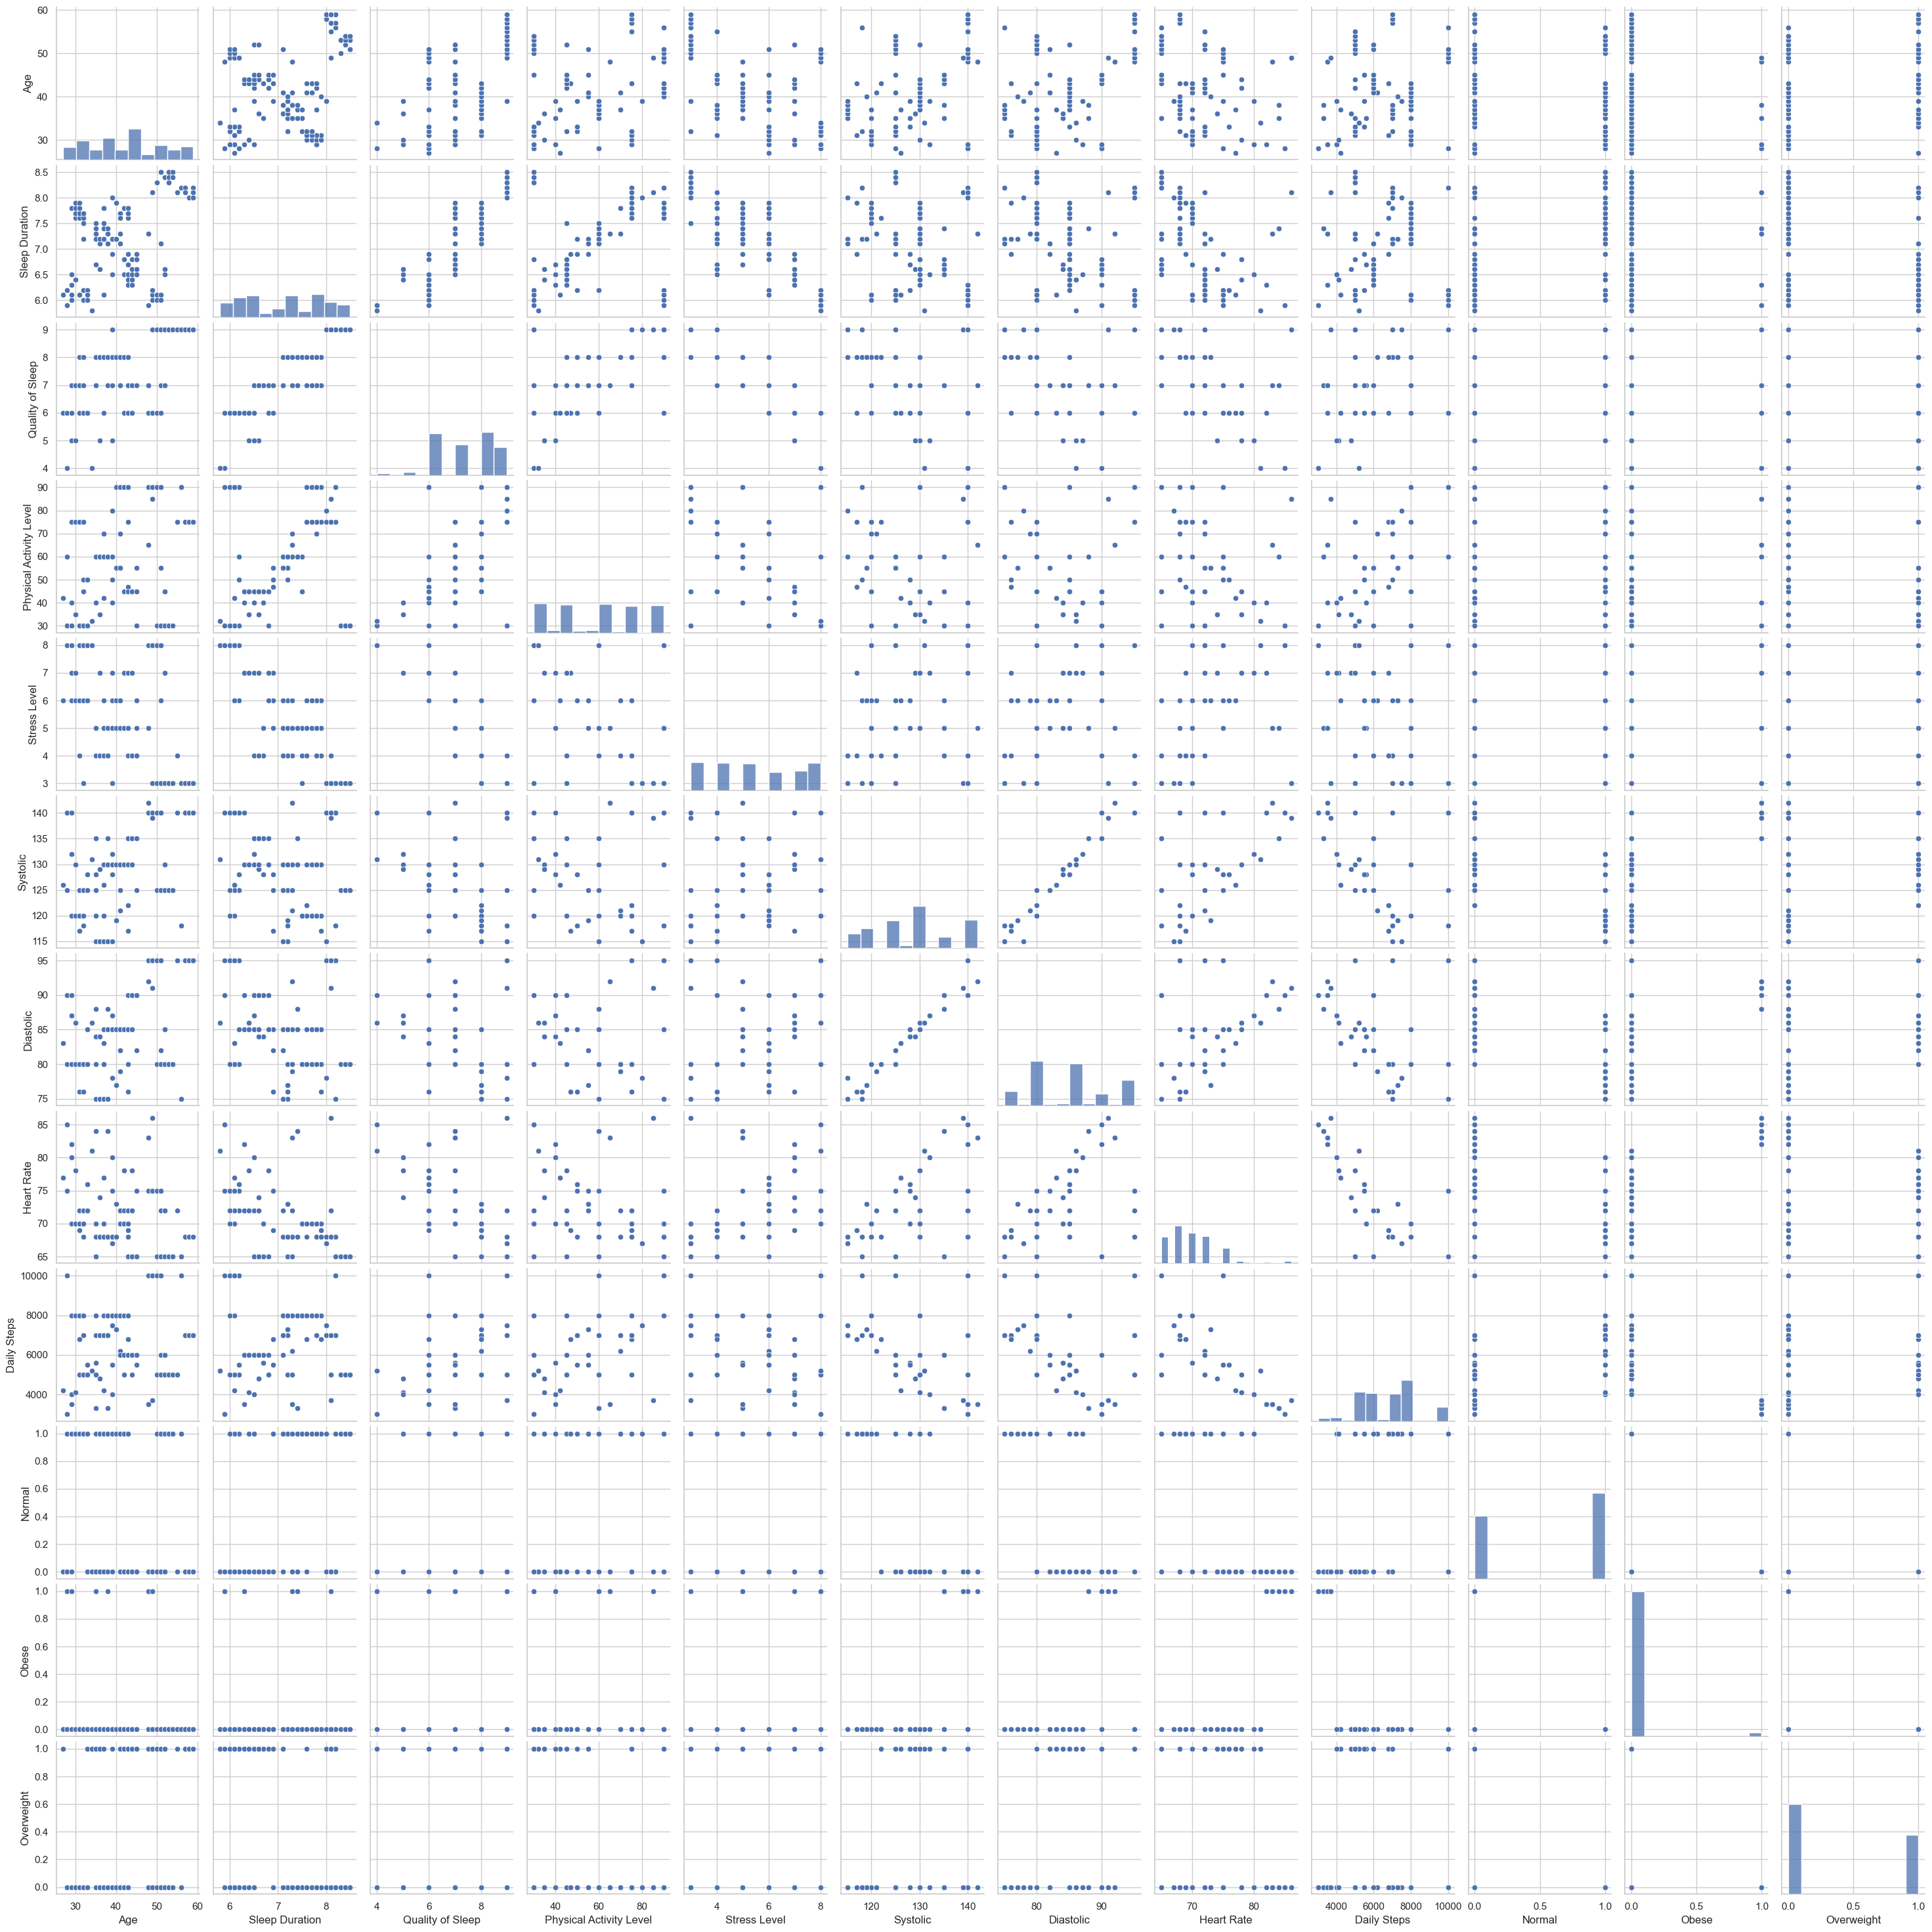

In [113]:
plt.figure()
sns.pairplot(df_with_num_col)